In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from IPython.display import Markdown as md
from pathlib import Path

In [2]:
# add comparison to each graph with WNE
# add a simulation that tells what positions could we take so that we still win

In [3]:
# case_name = ''

# file_name = ''

# sheet_name_all = ''

# subheats_list = ''

case_name = 'All_Cases'

file_name = './Final_Resuts_from_RITC_2022'

sheet_name_all = 'finalrank'

subheats_list = None

In [4]:
# Parameters
case_name = "All_Cases"
file_name = "/Users/kamilkashif/Documents/Python/RITC/inputs/Final_Resuts_from_RITC_2022"
sheet_name_all = "finalrank"
subheats_list = None


In [5]:
md(f"<font size = 5> Welcome to the analysis of <b>{case_name}</b>!</font>")  

<font size = 5> Welcome to the analysis of <b>All_Cases</b>!</font>

In [6]:
# import file
DF_ALL_CASES = pd.read_excel(f"{file_name}.xlsx", sheet_name=sheet_name_all)
DF_ALL_CASES = DF_ALL_CASES.drop(['\u200eDetail', '\u200eDetail.1',], axis=1).iloc[:-2]

In [7]:
%%capture

imp_cols = DF_ALL_CASES.iloc[:,1:5].columns

# calculating basic descriptive statistics
DF_ALL_CASES['Team2'] = DF_ALL_CASES['Team'].str[0:4]
DF_ALL_CASES["Mean"] = DF_ALL_CASES[imp_cols].mean(axis=1)
DF_ALL_CASES["Min"] = DF_ALL_CASES[imp_cols].min(axis=1)
DF_ALL_CASES["Max"] = DF_ALL_CASES[imp_cols].max(axis=1)

In [8]:
md(f"<font size = 4> We have calculated the Mean, Min, and Max for each Team. Check out the top 10:</font>")  

<font size = 4> We have calculated the Mean, Min, and Max for each Team. Check out the top 10:</font>

In [9]:
DF_ALL_CASES.head(10)

,Team,MATLAB VolatilityDetail,Liquidity RiskDetail,ElectricityDetail,AlgoDetail,Final,Team2,Mean,Min,Max
0,SZEI - Baruch College - Team B,1,6,3,4,1.0,SZEI,3.5,1,6
1,DDIO - Baruch College - Team C,4,1,2,15,2.0,DDIO,5.5,1,15
2,FQAR - University of Ottawa,6,2,7,9,3.0,FQAR,6.0,2,9
3,VRYK - Baruch College - Team A,8,3,4,13,4.0,VRYK,7.0,3,13
4,NCGQ - University of Calgary - Team B,7,8,9,5,5.0,NCGQ,7.25,5,9
5,"RZQO - University of Warsaw, Faculty of Econom...",11,24,1,1,6.0,RZQO,9.25,1,24
6,OCFZ - University of Calgary - Team A,10,9,16,8,7.0,OCFZ,10.75,8,16
7,OXLH - University of Lethbridge - Team A,5,16,5,18,8.0,OXLH,11.0,5,18
8,IVPJ - Fairfield University - Team B,2,21,19,6,9.0,IVPJ,12.0,2,21
9,UGWN - City University of Hong Kong,12,7,13,18,10.0,UGWN,12.5,7,18


In [10]:
md(f"<font size = 4> As we see, our faculty had the final ranking <b>{DF_ALL_CASES.loc[DF_ALL_CASES['Team2']=='RZQO', 'Final'].values}</b></font>")  

<font size = 4> As we see, our faculty had the final ranking <b>[6.]</b></font>

In [11]:
md(f"<font size = 4> This plot presents for each team the important statistics for <b>{case_name}</b></font>")  

<font size = 4> This plot presents for each team the important statistics for <b>All_Cases</b></font>

In [12]:
md(f"<font size = 3> <b>Red Dot</b> - Final Rank of the Team</font>")  

<font size = 3> <b>Red Dot</b> - Final Rank of the Team</font>

In [13]:
md(f"<font size = 3> <b>Blue Dot</b> -  Mean of the ranks based on all cases</font>")  

<font size = 3> <b>Blue Dot</b> -  Mean of the ranks based on all cases</font>

In [14]:
md(f"<font size = 3> <b>Green shaded area</b> -  the range between the minimum and the maximum rank taken based on all cases</font>")  

<font size = 3> <b>Green shaded area</b> -  the range between the minimum and the maximum rank taken based on all cases</font>

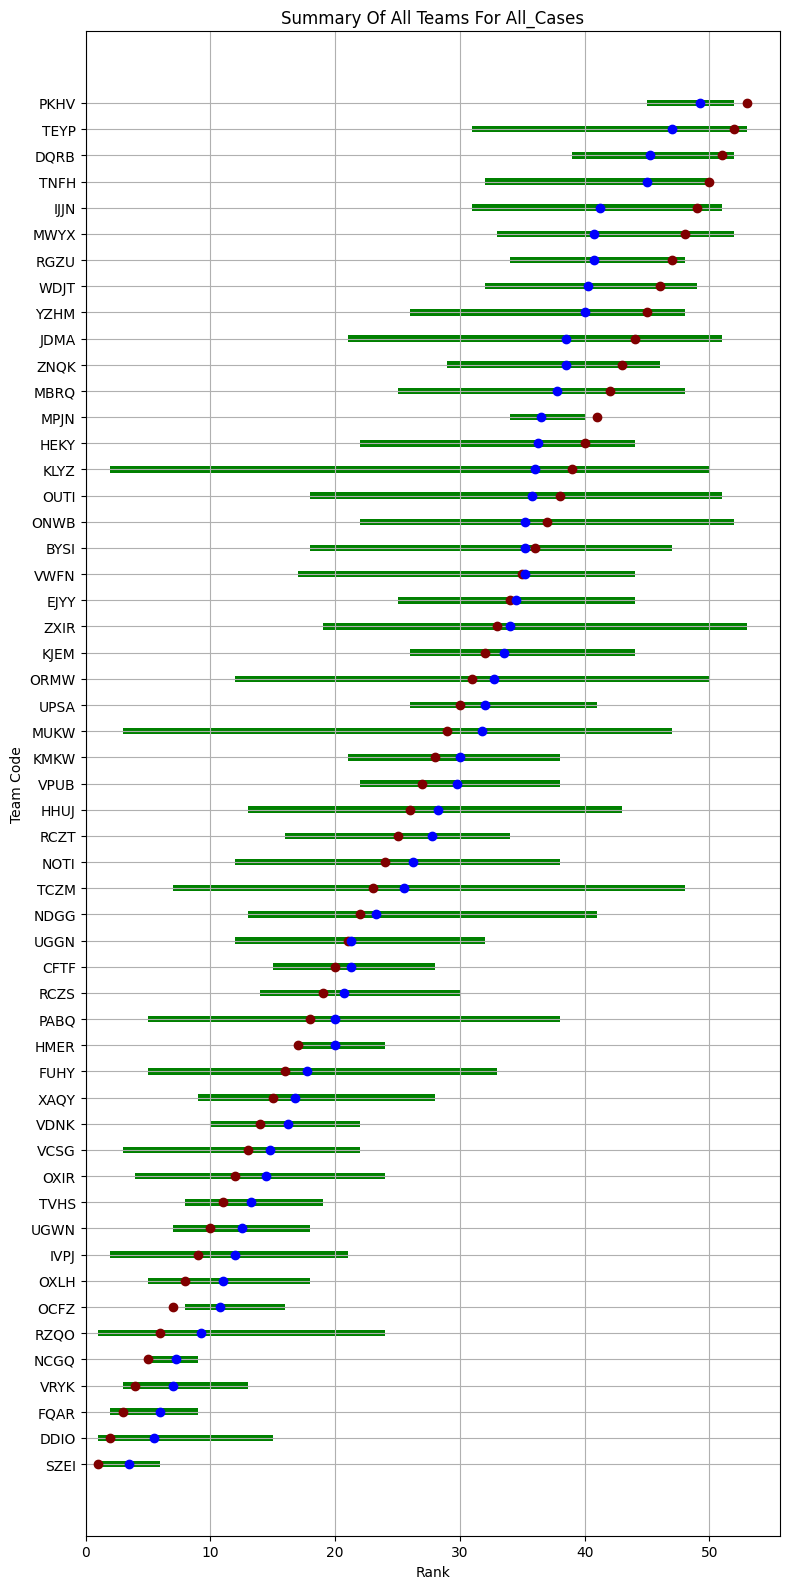

In [15]:
fig = plt.figure(figsize=(8, 16))
ax = fig.add_subplot(111)

ax.plot(
    DF_ALL_CASES.loc[:,"Final"],
    DF_ALL_CASES.loc[:,"Team2"],
    marker = "o",
    linestyle="",
    color = "maroon")

ax.plot(
    DF_ALL_CASES.loc[:,"Mean"],
    DF_ALL_CASES.loc[:,"Team2"],
    marker = "o",
    linestyle="",
    color = "blue")

ax.barh(
    DF_ALL_CASES.loc[:,"Team2"],
    DF_ALL_CASES.loc[:,"Min"],
    align='center',
    height=.25,
    color='white',
    label='min')

ax.barh(DF_ALL_CASES.loc[:,"Team2"],
        DF_ALL_CASES.loc[:,"Max"]-DF_ALL_CASES.loc[:,"Min"],
        align='center', 
        height=.25,
        left=DF_ALL_CASES.loc[:,"Min"],
        color='green',
        label='max')

ax.set_yticks(DF_ALL_CASES.loc[:,"Team2"])

ax.grid(True)
plt.title(f"Summary Of All Teams For {case_name}")

plt.xlabel('Rank')
plt.ylabel('Team Code')

plt.tight_layout()
plt.show()

In [16]:
CASES = ['AT', 'ET', 'LR', 'MVT']

df_cases = pd.DataFrame()

for i in CASES:
    df_ = pd.read_excel(f"{file_name}.xlsx", sheet_name=i)[['Team', 'Score', 'Rank']]
    df_.columns = df_.columns.values
    df_['Team2'] = df_['Team'].str[0:4]
    df_ = df_.drop('Team', axis=1)
    df_ = df_.loc[:52, :]

    df_.loc[:, 'Case'] = i
    df_cases = pd.concat([df_cases, df_])


In [17]:
DFDFCASES = df_cases.copy()
DFDFCASES = DFDFCASES.set_index('Team2')

In [18]:
df_AT = DFDFCASES.loc[DFDFCASES['Case']=='AT', 'Score']
df_ET = DFDFCASES.loc[DFDFCASES['Case']=='ET', 'Score']
df_LR = DFDFCASES.loc[DFDFCASES['Case']=='LR', 'Score']
df_MVT = DFDFCASES.loc[DFDFCASES['Case']=='MVT', 'Score']

In [19]:
final_score = 0.25*(df_AT+df_ET+df_LR+df_MVT)

df_final_Score = pd.DataFrame(final_score)

df_final_Score['Final Rank'] = df_final_Score['Score'].rank(ascending=False)
df_final_Score = df_final_Score.sort_values(by='Final Rank')

In [20]:
# DF_ALL_CASES = DF_ALL_CASES.set_index('Team2')
df_final_Score['REAL_RANK'] = DF_ALL_CASES['Final']